## Primitive Neural Network

This project aims to create a **functional neural network from scratch** without relying on libraries like TensorFlow or Keras.

### What will we use?
Instead of pre-built frameworks, we will focus on:
- **NumPy**: For numerical computations.
- **Linear Algebra**: To perform operations like matrix multiplication and vector transformations.
- **Mathematical Equations**: To implement neural network operations such as activation functions, weight updates, and backpropagation.

### Why build a neural network from scratch?
Creating a neural network manually helps us:
- **Understand the inner workings** of neural networks.
- Gain insight into how concepts like **weights, biases, forward propagation, and backpropagation** come together.
- Build a strong foundation for designing and debugging more complex machine learning models in the future.

In this project, we'll use the **MNIST dataset** to train a model to recognize handwritten digits. 

#### Dataset specifics:
- Each image is 28x28 pixels, in grayscale.
- The task involves classifying these images into 10 categories (digits 0–9).
- This is a **classification problem**.

---

## Acknowledgements

A huge shoutout to **Samson Zhang** for his incredible efforts in teaching machine learning enthusiasts how to build a neural network manually. His approach demystifies the process, making it accessible and engaging.

If you're interested, check out his full video tutorial [here](https://www.youtube.com/watch?v=w8yWXqWQYmU).


In [1]:
#importing all the dependencies
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# NN Architecture

In this project, we will be building a simple neural network with only **3 layers**: Input, Hidden, and Output. 

### Layer Breakdown:
- **Input Layer**: 
  - The first layer consists of **784 nodes** because each of the 784 pixels from the 28x28 MNIST images will map to a node. This will serve as our input layer.
  
- **Hidden Layer**: 
  - The second layer will be our **hidden layer** with **10 units** (nodes).
  
- **Output Layer**: 
  - The third layer will be the **output layer**, also with **10 units**. Since we are classifying digits (0-9), we need 10 output units to predict one of the 10 categories.

### Forward Propagation
In the first layer, also known as the **input layer**, we use **forward propagation** to pass the data through the network.

Here are the variables used in forward propagation:
- **A0**: This represents the input layer. It is simply equal to the input data **x**, as no processing occurs at this stage.
  
- **Z1**: This represents the un-activated hidden layer. In this layer, we apply weights and biases to **Z1** so that the neural network can learn patterns rather than memorize them. To introduce non-linearity, we apply an **activation function** to **Z1**. This ensures that each node is a **linear combination** of its corresponding nodes.
  - The activation function we will use here is **ReLU (Rectified Linear Unit)**, which allows the network to learn non-linear relationships.

- **A1**: This is the output of the hidden layer after applying the **ReLU** activation function to every value in **Z1**.

- **Z2**: This represents the second set of weights that connect the hidden layer to the output layer. At this stage, we apply the **Softmax** activation function, which gives the output a probability distribution between 0 and 1, allowing us to make predictions.

### Backward Propagation
Now, moving to **backward propagation**, we calculate the gradients and adjust the weights to minimize errors.

Here are the variables used in backward propagation:
- **dz2**: This represents the error term for the output layer. It is calculated by comparing the predicted output to the actual label. We use this error to adjust the weights in the output layer.
  
- **dw2**: This is the derivative of the loss function with respect to the weights in the output layer. It tells us how much each weight in the output layer contributed to the error.

- **db2**: This represents the average error of the output layer, helping to adjust the biases accordingly.

- **dz1**: This is the error term for the hidden layer. It tells us how much each weight in the hidden layer contributed to the error in the output layer.

---

I know all of this may sound complex at first, but trust me, once you start coding and seeing how the variables fit together, it will make much more sense. Stay strong, and let's get coding!



In [4]:
#getting our dataset ready 
data = pd.read_csv('D:/Coding Projects/primitive-NN/Data/train.csv')

In [5]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Convert data to numpy array
data = np.array(data)

# m = number of rows, n = number of columns
m, n = data.shape

# Shuffle the data to randomize before splitting into development and training sets
np.random.shuffle(data)

# Split data into development (dev) set (first 1000 samples)
data_dev = data[0:1000].T
Y_dev = data_dev[0]  # First row is the labels (Y_dev)
X_dev = data_dev[1:n]  # Rest are the features (X_dev)
X_dev = X_dev / 255.  # Normalize the features by dividing by 255 (scaling pixel values between 0 and 1)

# Split data into training set (remaining samples after 1000)
data_train = data[1000:m].T
Y_train = data_train[0]  # First row is the labels (Y_train)
X_train = data_train[1:n]  # Rest are the features (X_train)
X_train = X_train / 255.  # Normalize the features by dividing by 255 (scaling pixel values between 0 and 1)

# Get the number of training examples
_, m_train = X_train.shape


In [ ]:
# Initialize parameters (weights and biases)
def init_params():
    # Initialize weight matrices with random values, shifted by -0.5 for better symmetry
    W1 = np.random.rand(10, 784) - 0.5  # Weights for layer 1 (784 input nodes to 10 hidden units)
    b1 = np.random.rand(10, 1) - 0.5     # Bias for layer 1
    W2 = np.random.rand(10, 10) - 0.5    # Weights for layer 2 (10 hidden units to 10 output units)
    b2 = np.random.rand(10, 1) - 0.5     # Bias for layer 2
    return W1, b1, W2, b2

# ReLU activation function (Rectified Linear Unit)
def ReLU(Z):
    # Applies the ReLU activation: returns 0 for negative values and the input for positive values
    return np.maximum(Z, 0)

# Softmax activation function to normalize output probabilities
def softmax(Z):
    # Applies softmax to convert the raw output into probabilities (values between 0 and 1)
    A = np.exp(Z) / sum(np.exp(Z))  # Normalizes the output values
    return A

# Forward propagation: computes the activations for each layer
def forward_prop(W1, b1, W2, b2, X):
    # Compute the activation for the hidden layer (Z1 and A1)
    Z1 = W1.dot(X) + b1  # Linear transformation of input X (using weights W1 and bias b1)
    A1 = ReLU(Z1)        # Apply ReLU activation to Z1
    # Compute the output layer (Z2 and A2)
    Z2 = W2.dot(A1) + b2  # Linear transformation of hidden layer A1 (using weights W2 and bias b2)
    A2 = softmax(Z2)      # Apply softmax activation to Z2 to get probabilities for output
    return Z1, A1, Z2, A2

# Derivative of ReLU activation function for backpropagation
def ReLU_deriv(Z):
    # Derivative of ReLU: 1 for positive values and 0 for non-positive values
    return Z > 0

# One-hot encoding function for labels (used for classification problems)
def one_hot(Y):
    # Convert the integer labels to one-hot encoded vectors
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))  # Create an array of zeros with shape (num_samples, num_classes)
    one_hot_Y[np.arange(Y.size), Y] = 1  # Set the correct class positions to 1
    one_hot_Y = one_hot_Y.T  # Transpose the array to match the format (num_classes, num_samples)
    return one_hot_Y

# Backward propagation: computes the gradients for weights and biases
def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    # One-hot encode the labels
    one_hot_Y = one_hot(Y)
    # Calculate the error in the output layer (difference between prediction and actual label)
    dZ2 = A2 - one_hot_Y
    # Compute the gradient for weights in the output layer (W2) and the biases in the output layer (b2)
    dW2 = 1 / m * dZ2.dot(A1.T)  # Gradient of W2
    db2 = 1 / m * np.sum(dZ2)    # Gradient of b2 (summed over all samples)
    # Calculate the error in the hidden layer (using the gradient of the weights W2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)  # Gradient of Z1 (error in hidden layer)
    # Compute the gradient for weights in the hidden layer (W1) and the biases in the hidden layer (b1)
    dW1 = 1 / m * dZ1.dot(X.T)  # Gradient of W1
    db1 = 1 / m * np.sum(dZ1)   # Gradient of b1 (summed over all samples)
    return dW1, db1, dW2, db2

# Update parameters (weights and biases) using gradients and learning rate (alpha)
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    # Update the weights and biases by subtracting the gradients scaled by the learning rate
    W1 = W1 - alpha * dW1  # Update W1
    b1 = b1 - alpha * db1  # Update b1
    W2 = W2 - alpha * dW2  # Update W2
    b2 = b2 - alpha * db2  # Update b2
    return W1, b1, W2, b2



In [ ]:
# Function to get the predictions by selecting the class with the highest probability
def get_predictions(A2):
    # np.argmax returns the index of the maximum value along the specified axis (axis 0 means column-wise)
    return np.argmax(A2, 0)

# Function to compute the accuracy by comparing predictions to actual labels
def get_accuracy(predictions, Y):
    # Print predictions and actual labels for debugging purposes
    print(predictions, Y)
    # Calculate accuracy: number of correct predictions divided by total samples
    return np.sum(predictions == Y) / Y.size

# Gradient descent function to optimize the weights and biases
def gradient_descent(X, Y, alpha, iterations):
    # Initialize parameters (weights and biases) randomly
    W1, b1, W2, b2 = init_params()
    # Loop through the specified number of iterations to perform gradient descent
    for i in range(iterations):
        # Forward propagation to calculate activations (Z1, A1, Z2, A2)
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        # Backward propagation to compute gradients of the parameters (weights and biases)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        # Update parameters using the gradients computed above and the learning rate (alpha)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        # Print progress every 10 iterations for tracking
        if i % 10 == 0:
            print("Iteration: ", i)
            # Get predictions for the current iteration
            predictions = get_predictions(A2)
            # Calculate and print accuracy for the current predictions
            print(get_accuracy(predictions, Y))
    # Return the updated weights and biases after all iterations
    return W1, b1, W2, b2

In [27]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[9 8 3 ... 0 7 0] [2 5 3 ... 8 7 1]
0.09797560975609756
Iteration:  10
[9 0 0 ... 0 7 2] [2 5 3 ... 8 7 1]
0.23746341463414633
Iteration:  20
[9 0 0 ... 0 7 6] [2 5 3 ... 8 7 1]
0.35897560975609755
Iteration:  30
[9 0 0 ... 0 7 1] [2 5 3 ... 8 7 1]
0.4441219512195122
Iteration:  40
[9 0 3 ... 8 7 1] [2 5 3 ... 8 7 1]
0.5122439024390244
Iteration:  50
[2 5 3 ... 8 7 1] [2 5 3 ... 8 7 1]
0.5639024390243902
Iteration:  60
[8 5 3 ... 8 7 1] [2 5 3 ... 8 7 1]
0.6065365853658536
Iteration:  70
[8 5 3 ... 8 7 1] [2 5 3 ... 8 7 1]
0.6407560975609756
Iteration:  80
[8 5 3 ... 8 7 1] [2 5 3 ... 8 7 1]
0.6675365853658537
Iteration:  90
[8 5 3 ... 8 7 1] [2 5 3 ... 8 7 1]
0.6915365853658536
Iteration:  100
[8 5 3 ... 8 7 1] [2 5 3 ... 8 7 1]
0.711170731707317
Iteration:  110
[8 5 3 ... 8 7 1] [2 5 3 ... 8 7 1]
0.7265609756097561
Iteration:  120
[8 5 3 ... 8 7 1] [2 5 3 ... 8 7 1]
0.7405121951219512
Iteration:  130
[8 5 3 ... 8 7 1] [2 5 3 ... 8 7 1]
0.7515853658536585
Iteration:  140

## Results

* After training the model for 500 epochs (iterations) with a learning rate of 0.1, I know this may not be as dynamic as you might have hoped, but here it goes!
* We achieved an average accuracy of **86%** after training the model for over 1500 epochs. This is a solid starting point and demonstrates the model’s potential for making predictions.

Now it's time to test the model's performance using some sample images:

In [ ]:
# Testing pipeline: function to make predictions using the trained model
def make_predictions(X, W1, b1, W2, b2):
    # Perform forward propagation and get the output activations (A2)
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    # Use the output activation (A2) to get the predicted class
    predictions = get_predictions(A2)
    return predictions

# Function to test the prediction for a single image from the training dataset
def test_prediction(index, W1, b1, W2, b2):
    # Select the current image from the training set using the given index
    current_image = X_train[:, index, None]
    # Get the prediction for the current image
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    # Get the actual label of the image
    label = Y_train[index]
    # Print the predicted and actual labels
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    # Reshape the image to 28x28 pixels and scale it back to the 0-255 range for display
    current_image = current_image.reshape((28, 28)) * 255
    # Display the image using matplotlib (grayscale)
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()


Prediction:  [8]
Label:  2


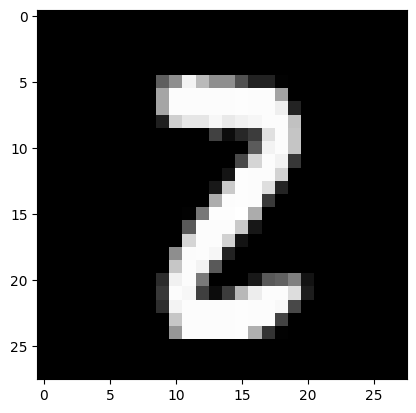

Prediction:  [3]
Label:  3


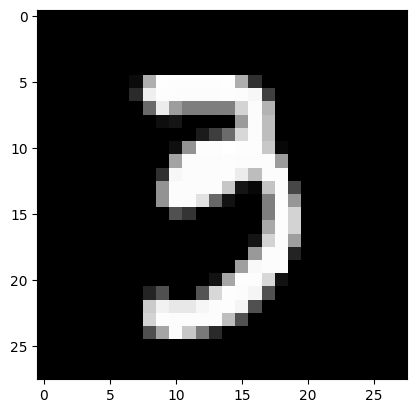

Prediction:  [8]
Label:  8


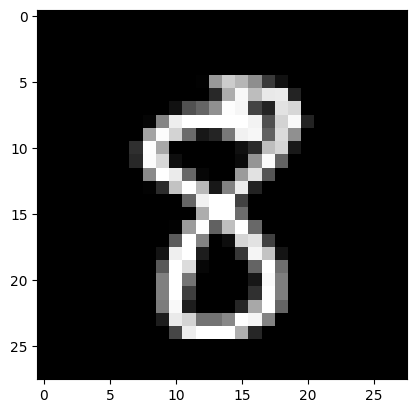

Prediction:  [6]
Label:  6


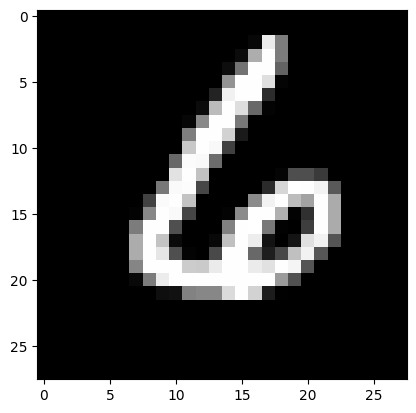

In [30]:
#testing examples:
test_prediction(0, W1, b1, W2, b2)
test_prediction(5, W1, b1, W2, b2)
test_prediction(15, W1, b1, W2, b2)
test_prediction(25, W1, b1, W2, b2)

# Conclusion

As you can see from the prediction examples above, the model was able to make predictions on 4 examples, out of which 3 were correct, and 1 was incorrect. Given our model's average accuracy of **86%**, this performance is quite decent.

**Future Work:**
In the future, we can improve the model further by:

* Fine-tuning it more, for example, by adjusting the learning rate or applying a dynamic learning rate.
* Adding more hidden layers to improve the model’s ability to capture complex relationships.
* Training the model for longer periods to improve convergence and overall performance.

**Objective:**
The primary objective of this project was to gain a deeper understanding of how a basic neural network works. I believe this knowledge will be valuable in future work, as it provides insights into why and how these techniques are used in machine learning and AI applications.
